In [30]:
import pandas as pd
import networkx as nx
import json

In [31]:
#read the json file
with open('osgoode_faculty_bios.json') as f:
    data = json.load(f)

In [56]:
for prof in data:
    prof['keyword_list'] = [keyword.strip().replace('.','') for keyword in prof['keywords'].split(';')]

profs = {}
for prof in data:
    profs[prof['name']] = prof['keyword_list']


In [74]:
G = nx.Graph()

In [75]:
for name, keywords in profs.items():
    G.add_node(name, keywords=keywords)

In [81]:
for name1, keywords1 in profs.items():
    for name2, keywords2 in profs.items():
        if name1 != name2:
            shared_keywords = set(keywords1) & set(keywords2)
            similarity_score = len(shared_keywords)
            if similarity_score >= 1: # set a threshold for adding edges
                G.add_edge(name1, name2, weight=similarity_score)

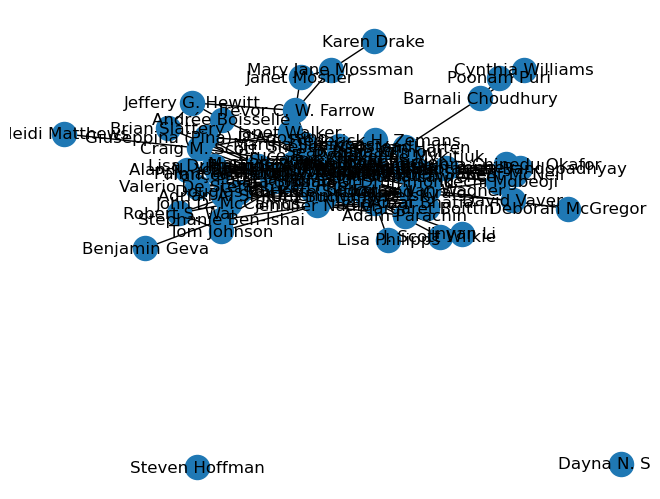

In [82]:
pos = nx.spring_layout(G) # set a fixed seed for reproducibility
nx.draw(G, pos=pos, with_labels=True)

In [87]:
import matplotlib.pyplot as plt
print(len(keywords))

7


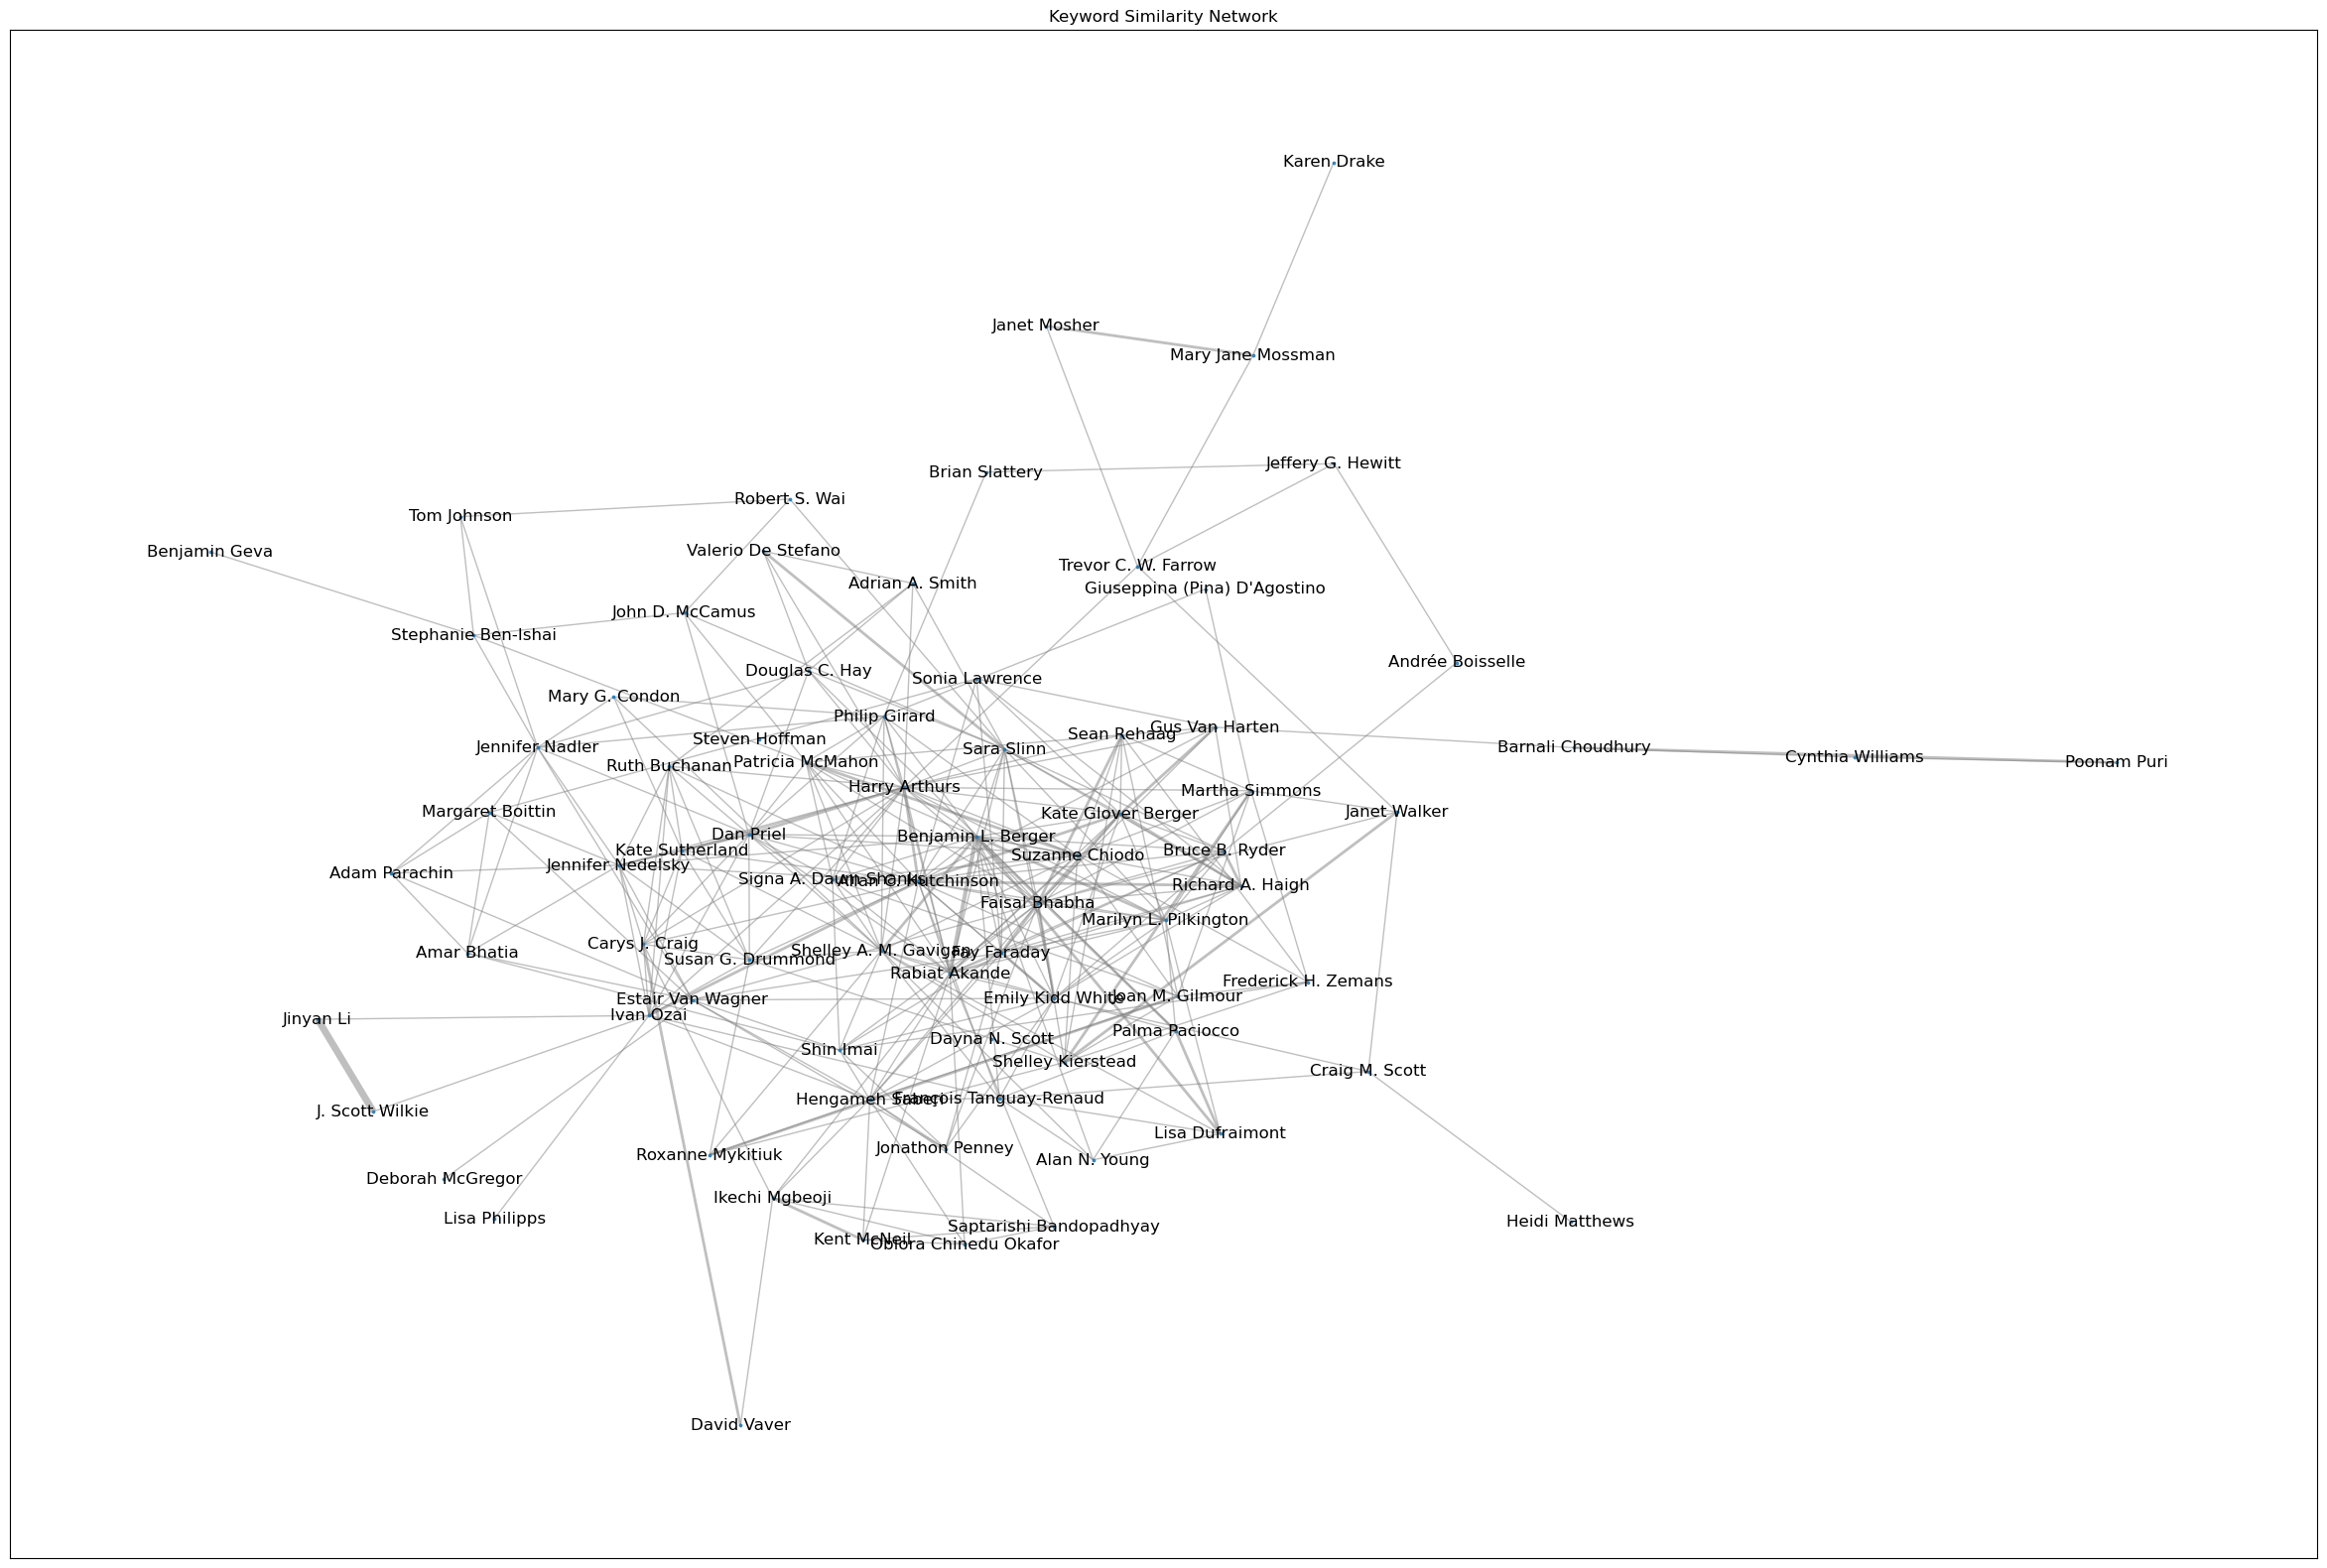

In [94]:
fig, ax = plt.subplots(figsize=(30, 20))

# customize node sizes and font sizes
node_size = 3
font_size = 12

# visualize the network
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=node_size, alpha=0.8)
nx.draw_networkx_labels(G, pos=pos, font_size=font_size)
nx.draw_networkx_edges(G, pos=pos, edge_color='gray', alpha=0.5, width=[d['weight'] for (u, v, d) in G.edges(data=True)])

# set the plot title and axis labels
plt.title('Keyword Similarity Network')

# show the plot
plt.show()

In [103]:
#make a list of each prof and their degree
#this will show how many keyword connections each person has with another person
prof_degrees = []
for prof in G.nodes():
    prof_degrees.append((prof, G.degree(prof)))
prof_degrees.sort(key=lambda x: x[1], reverse=True)
prof_degrees

[('Harry Arthurs', 26),
 ('Allan C. Hutchinson', 26),
 ('Rabiat Akande', 22),
 ('Benjamin L. Berger', 22),
 ('Faisal Bhabha', 21),
 ('Shelley A. M. Gavigan', 18),
 ('Dan Priel', 18),
 ('Hengameh Saberi', 16),
 ('Sara Slinn', 16),
 ('Emily Kidd White', 16),
 ('Fay Faraday', 15),
 ('Kate Glover Berger', 14),
 ('Suzanne Chiodo', 14),
 ('Jennifer Nedelsky', 14),
 ('Marilyn L. Pilkington', 14),
 ('Patricia McMahon', 13),
 ('Ivan Ozai', 13),
 ('Philip Girard', 12),
 ('Richard A. Haigh', 12),
 ('Estair Van Wagner', 12),
 ('Signa A. Daum Shanks', 11),
 ('Susan G. Drummond', 11),
 ('Jennifer Nadler', 11),
 ('Bruce B. Ryder', 11),
 ('Carys J. Craig', 10),
 ('Shin Imai', 10),
 ('Shelley Kierstead', 10),
 ('Sean Rehaag', 10),
 ('Martha Simmons', 10),
 ('Kate Sutherland', 10),
 ('François Tanguay-Renaud', 10),
 ('Ruth Buchanan', 9),
 ('Joan M. Gilmour', 9),
 ('Gus Van Harten', 8),
 ('Douglas C. Hay', 7),
 ('Ikechi Mgbeoji', 7),
 ('Palma Paciocco', 7),
 ('Amar Bhatia', 6),
 ('Margaret Boittin', 6),


In [107]:
#do a greedy modularity clustering
#this will group people together based on their keyword connections
#the higher the modularity score, the better the clustering
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(G)

In [109]:
print(f'There are {len(communities)} communities in the network.')

There are 9 communities in the network.


In [117]:
for i, community in enumerate(communities):
    print(f'Community {i + 1}:')
    for prof in community:
        print(prof, end=', ')
    print('\n---')
#this doesn't look like a very effective clustering to me.

Community 1:
Susan G. Drummond, Ikechi Mgbeoji, David Vaver, Jinyan Li, Sara Slinn, Adrian A. Smith, Valerio De Stefano, J. Scott Wilkie, Lisa Philipps, Ruth Buchanan, Carys J. Craig, Douglas C. Hay, Jennifer Nedelsky, Dan Priel, Harry Arthurs, Kate Sutherland, Allan C. Hutchinson, Ivan Ozai, 
---
Community 2:
Alan N. Young, François Tanguay-Renaud, Mary G. Condon, Stephanie Ben-Ishai, Lisa Dufraimont, Jennifer Nadler, Robert S. Wai, Patricia McMahon, Palma Paciocco, Philip Girard, Benjamin Geva, Signa A. Daum Shanks, John D. McCamus, Benjamin L. Berger, Tom Johnson, Shelley A. M. Gavigan, Suzanne Chiodo, 
---
Community 3:
Adam Parachin, Fay Faraday, Marilyn L. Pilkington, Estair Van Wagner, Bruce B. Ryder, Gus Van Harten, Deborah McGregor, Sonia Lawrence, Margaret Boittin, Amar Bhatia, Faisal Bhabha, Richard A. Haigh, Kate Glover Berger, Shin Imai, Emily Kidd White, Jonathon Penney, 
---
Community 4:
Janet Walker, Shelley Kierstead, Heidi Matthews, Martha Simmons, Joan M. Gilmour, Fre

In [119]:
from networkx.algorithms.community import louvain_communities
communities = louvain_communities(G, seed=42)
print(f'There are {len(communities)} communities in the network.')

There are 11 communities in the network.


In [120]:
for i, community in enumerate(communities):
    print(f'Community {i + 1}:')
    for prof in community:
        print(prof, end=', ')
    print('\n---')
#this looks quite a bit better than the greedy modularity clustering

Community 1:
Jennifer Nedelsky, Susan G. Drummond, Lisa Philipps, Dan Priel, David Vaver, Harry Arthurs, Kate Sutherland, Allan C. Hutchinson, Ivan Ozai, Ruth Buchanan, Carys J. Craig, 
---
Community 2:
Barnali Choudhury, Cynthia Williams, Poonam Puri, 
---
Community 3:
Alan N. Young, Heidi Matthews, Palma Paciocco, François Tanguay-Renaud, Benjamin L. Berger, Lisa Dufraimont, Craig M. Scott, Shelley A. M. Gavigan, 
---
Community 4:
Fay Faraday, Faisal Bhabha, Marilyn L. Pilkington, Richard A. Haigh, Bruce B. Ryder, Kate Glover Berger, Shin Imai, Gus Van Harten, Emily Kidd White, Sonia Lawrence, Jonathon Penney, 
---
Community 5:
Trevor C. W. Farrow, Brian Slattery, Janet Mosher, Andrée Boisselle, Karen Drake, Jeffery G. Hewitt, Mary Jane Mossman, 
---
Community 6:
Steven Hoffman, 
---
Community 7:
Patricia McMahon, Janet Walker, Shelley Kierstead, Martha Simmons, Joan M. Gilmour, Philip Girard, Frederick H. Zemans, Mary G. Condon, Sean Rehaag, Signa A. Daum Shanks, Roxanne Mykitiuk, G

In [121]:
colors = ["" for x in range(G.number_of_nodes())]
from random import randint
counter = 0
for com in communities:
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    for node in list(com):
        colors[counter] = color
        counter += 1

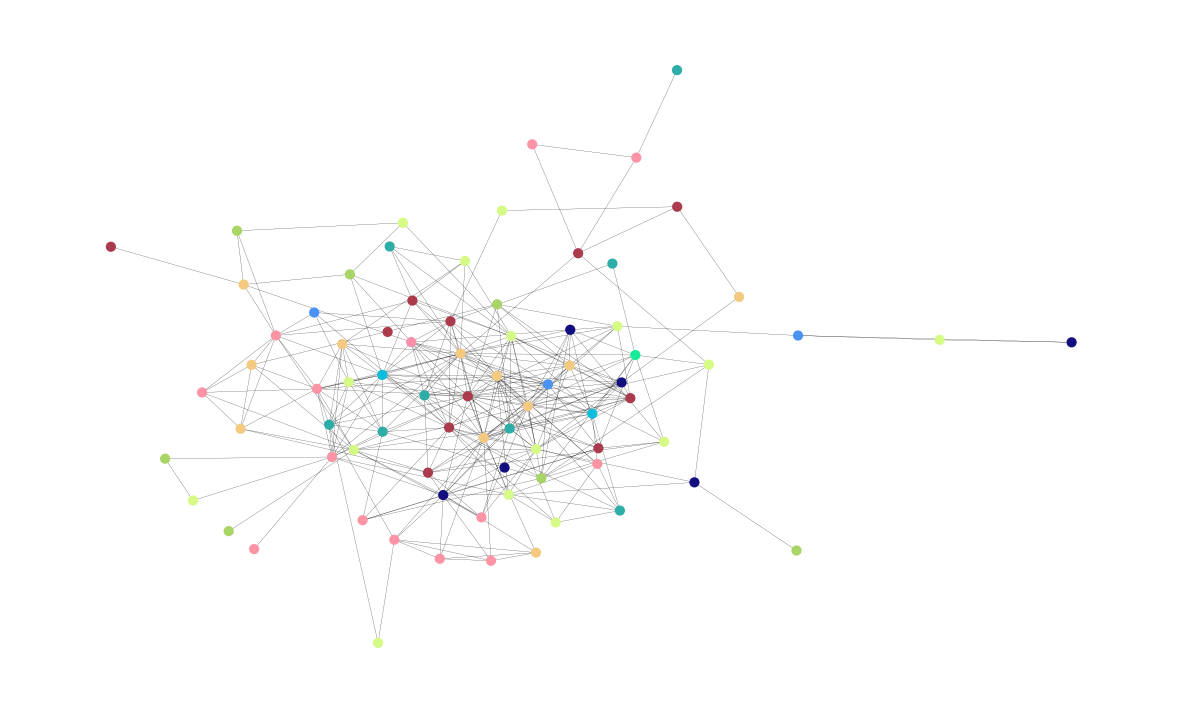

In [122]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=40, with_labels=False, width=0.15, node_color=colors
)